In [30]:
import csv
import numpy as np
from numpy.linalg import inv 
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from numpy.linalg import eig
# reading csv file to extract data into numpy array
with open('railway_data.csv', 'r') as f:
    railway = list(csv.reader(f, delimiter=','))
    rail_data = np.array(railway)

# separating feature and label
X = rail_data[1:][:,[0,2,3,4,5,6]]
for i in range(X.shape[0]):
    if(X[i][4] == 'female'):
        X[i][4] = '0'
    else:
        X[i][4] = '1'
for i in range(X.shape[0]):
    if(X[i][3] == 'FIRST_AC'):
        X[i][3] = '0'
    elif(X[i][3] == 'SECOND_AC'):
        X[i][3] = '1'
    else:
        X[i][3] = '2'
        
X = X.astype('float')
Y = rail_data[1:,1].astype('float')
classes = [0,1]

In [31]:
def PCA(images,dimensionToProject):
    # calculate the mean of each column
    M = np.mean(np.array(images).T.tolist(), axis=1)
    # center columns by subtracting column means

    C = images - M
    print (C.shape)
    # calculate covariance matrix of centered matrix
    V = np.cov(C.T)
    # eigendecomposition of covariance matrix
    values, vectors = eig(V)
    vectors = vectors[:np.shape(vectors)[0],0:dimensionToProject]
    # project data
    P = (vectors.T.dot(C.T)).T
    print (vectors.tolist())
    return (np.real(P))

In [32]:
X = (X-np.mean(X,axis =0))/np.std(X,axis =0)

In [33]:
X = PCA(X,3)

(1309, 6)
[[0.09999809948454519, -0.024419562618042377, -0.022896706245837763], [-0.5961805394272607, 0.637980272601093, -0.1778432724684281], [-0.11649516576907942, -0.2515825864981859, -0.6910029058344447], [0.6223607177543213, 0.7030618855821452, -0.18526014282291373], [0.2374629928361005, -0.02671464577267912, 0.504884444283605], [-0.42104214146541463, 0.1846114071426255, 0.4484783972621587]]


In [34]:
v = np.array([[0.09999809948454519, -0.024419562618042377, -0.022896706245837763], [-0.5961805394272607, 0.637980272601093, -0.1778432724684281], [-0.11649516576907942, -0.2515825864981859, -0.6910029058344447], [0.6223607177543213, 0.7030618855821452, -0.18526014282291373], [0.2374629928361005, -0.02671464577267912, 0.504884444283605], [-0.42104214146541463, 0.1846114071426255, 0.4484783972621587]])
print (v)

[[ 0.0999981  -0.02441956 -0.02289671]
 [-0.59618054  0.63798027 -0.17784327]
 [-0.11649517 -0.25158259 -0.69100291]
 [ 0.62236072  0.70306189 -0.18526014]
 [ 0.23746299 -0.02671465  0.50488444]
 [-0.42104214  0.18461141  0.4484784 ]]


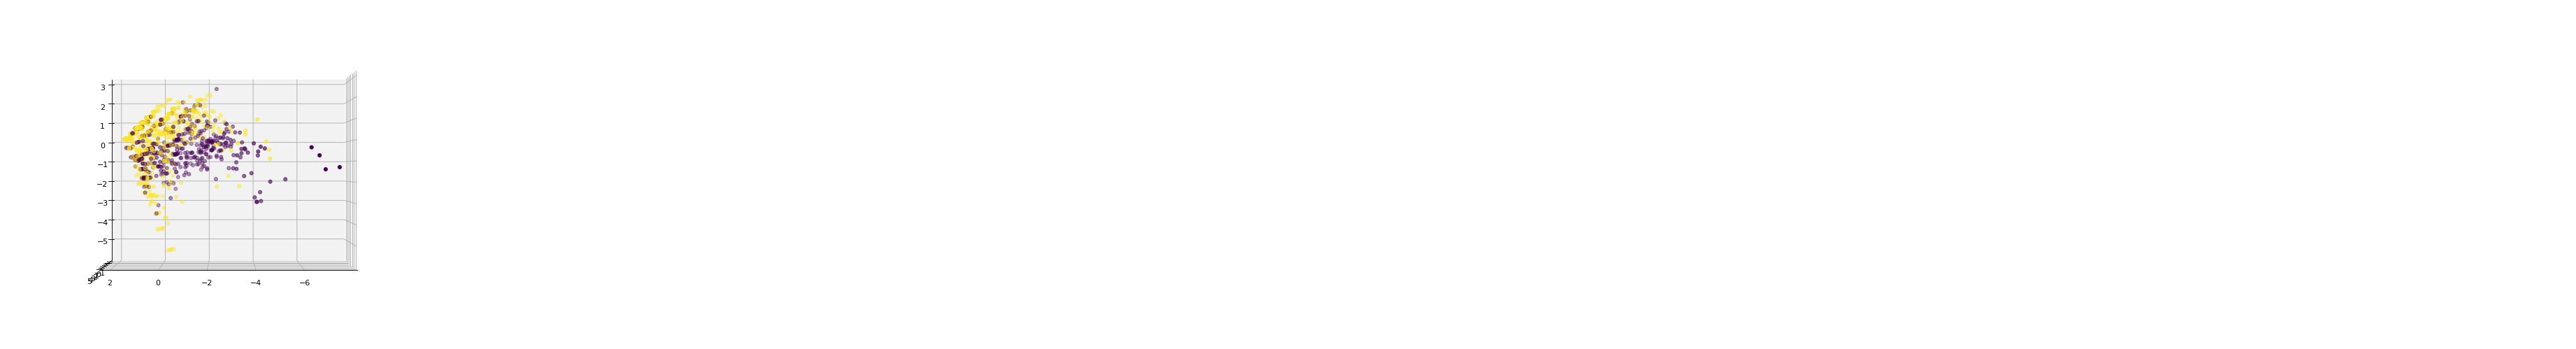

In [45]:
from mpl_toolkits.mplot3d import Axes3D
plt3d = plt.figure(num = None,figsize = (10,8),dpi = 80).gca(projection = '3d')
ax = plt.gca()
ax.scatter3D(X[:,0],X[:,1],X[:,2],c = Y)
ax.view_init(0,90)
plt.savefig('railway_SVM')

In [5]:
def multiclassSVM(X,Y,classes):
    f = X.shape[1]
    n = X.shape[0]
    c = len(classes)
    W = np.zeros((c,f))
    b = np.zeros((c))
    for i in range(c):
        Ty = np.zeros((n))
        for j in range(n):
            if Y[j] == classes[i]:
                Ty[j] = 1
            else:
                Ty[j] = -1
        clf = SVC(kernel = 'linear')
        clf.fit(X, Ty.ravel())
        W[i],b[i] = clf.coef_[0],clf.intercept_
    return W,b

In [6]:
W,b = multiclassSVM(X,Y,classes)

In [7]:
def accuracy(X,Y,W,b,classes):
    c = len(classes)         #number of classes
    n = X.shape[0]           #number of data samples
    f = W.shape[1]           #input dimension
    acc = 0                  #number of correctly classified inputs
    
    # implementing soft-max to calculate predicted class
    g = np.zeros(c)     # probability for each class
    for i in range(n):
        g = np.exp((W@X[i].reshape(f,1)).reshape(c)+b)
        y_predicted = np.where(g == max(g))
        if (y_predicted[0] == classes.index(Y[i])):
            acc += 1
    
    return acc/X.shape[0]

In [8]:
acc = accuracy(X,Y,W,b,classes)
print (acc*100)

77.99847211611917


In [9]:
print (W)
print (b)

[[-6.78416915e-05 -3.88699968e-05 -1.23199882e-05 -1.97658813e-04
  -9.57607259e-01 -1.87128929e-06]
 [-8.31016447e-06  3.98858651e-06  1.02198022e-04 -1.14868159e-04
   9.57739805e-01  1.02709249e-04]]
[-0.28810495  0.2879991 ]


In [36]:
W=W@v

In [37]:
print (W)

[[-0.22750069  0.02542278 -0.48342825]
 [ 0.22729791 -0.02567044  0.48354413]]


In [41]:
print (X)

[[-3.44225456  1.34356702 -0.59819399]
 [-1.79700544 -0.18513458 -1.22909324]
 [-2.36412714 -0.11195857 -2.26724192]
 ...
 [ 1.19676751  0.3454719   0.66472175]
 [ 0.99321747  0.39517888  0.71132889]
 [ 1.15836877  0.35484888  0.67351396]]


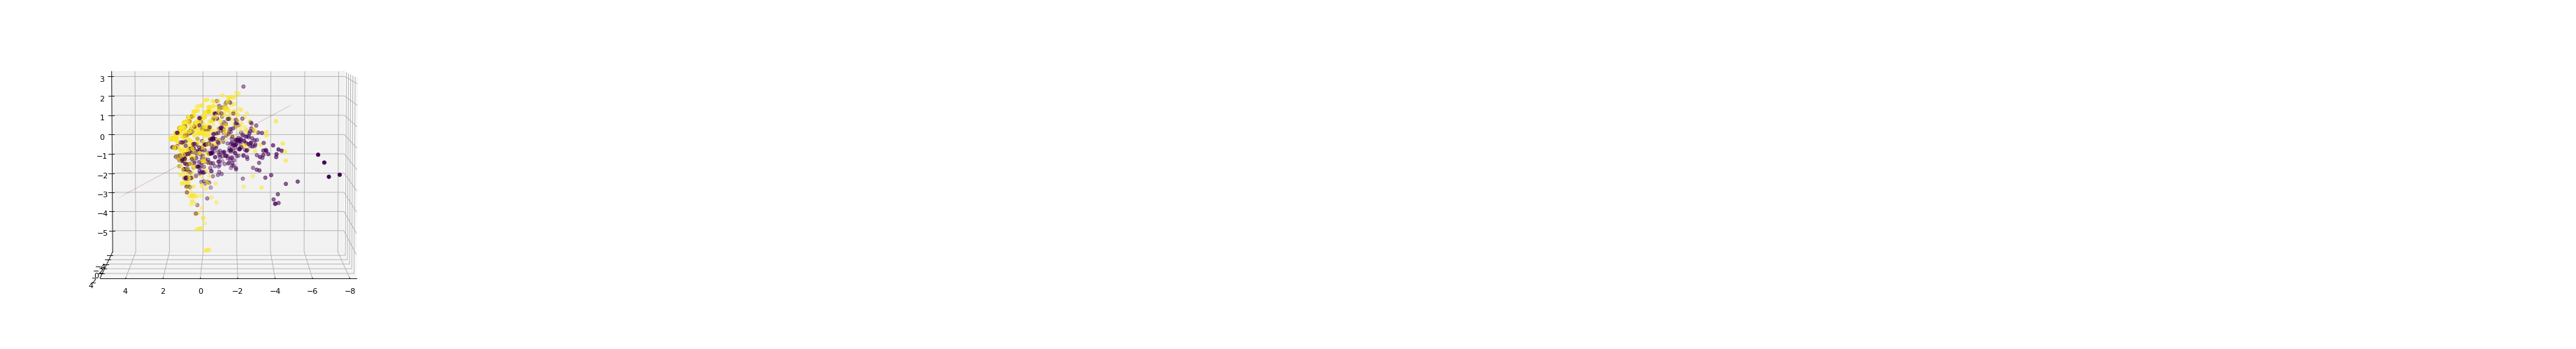

In [44]:
x1 = np.arange(-5,5,0.5)
y1 = np.arange(-5,5,0.5)

xx,yy = np.meshgrid(x1,y1)
z = ((-W[0][0]*xx-W[0][1]*yy-b[0])*1./W[0][2])
plt3d = plt.figure('railway',figsize = (10,8),dpi = 80).gca(projection = '3d')
plt3d.plot_surface(xx,yy,z,alpha = 0.2,color = 'red')

ax = plt.gca()

ax.scatter3D(X[:,0],X[:,1],X[:,2],c = Y)
ax.view_init(0,90)
plt.savefig('railway_SVM_hyperplane')